# Exploratory Data Analysis

In [8]:
# Load data from file

import json

import pandas as pd

data = []

# pd.set_option('max_colwidth', 190)
# pd.set_option('display.max_rows', 5000)

with open('./labelled_data/1000_labelled_argument_sentences_8.json') as f:
    for line in f:
        json_line = json.loads(line)
        arg = {"text": json_line["content"], "label": json_line["annotation"]["labels"][0]}

        data.append(arg)

In [42]:
# Create document term matrices (dtm) and corpus

from sklearn.feature_extraction.text import CountVectorizer

# Corpus
df_corpus = pd.DataFrame().from_dict(data, orient='columns')

# dtm without stop words
cv = CountVectorizer(stop_words='english')
df_cv = cv.fit_transform(df_corpus.text)
df_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_corpus.index

# dtm With stop words
cv_all = CountVectorizer()
df_cv_all = cv_all.fit_transform(df_corpus.text)
df_dtm_all = pd.DataFrame(df_cv_all.toarray(), columns=cv_all.get_feature_names())
df_dtm_all.index = df_corpus.index

display(df_corpus.head())
display(df_dtm.head())
display(df_dtm_all.head())

,text,label
0,I assume that she was talking about muscle memory?,not-arg
1,So what behavior is it that you object to in people who are against cultural appropriation?,not-arg
2,The rule has to be that the person who used the word gets to define what they meant by it.,arg
3,I would understand every word but sometimes not get the overall meaning.,not-arg
4,"When I was studying the psychology of learning in university, almost all of the studies we looked at corresponded to automatic/subconsciously learned things.",arg


,000,0001,10,100,12,14,15,1800s,1820,1950s,...,ye,yeah,year,years,yes,young,youth,youtu,yup,zobotshs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,000,0001,10,100,12,14,15,1800s,1820,1950s,...,yet,you,young,your,yours,yourself,youth,youtu,yup,zobotshs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Number of arg and not-arg
display(len(df_corpus[df_corpus["label"] == "arg"]))
display(len(df_corpus[df_corpus["label"] == "not-arg"]))

295

205

In [26]:
# Average number of words in each sentence of arg and not-arg 

dtm_arg = df_dtm.loc[df_corpus.index[df_corpus["label"] == "arg"].tolist()]
dtm_notarg = df_dtm.loc[df_corpus.index[df_corpus["label"] == "not-arg"].tolist()]

display(dtm_arg.sum(axis=1).mean())
display(dtm_notarg.sum(axis=1).mean())

9.24406779661017

5.2

In [28]:
# Most Common Words - Quantitative
display(dtm_arg.sum().sort_values(ascending=False).head(30))
display(dtm_notarg.sum().sort_values(ascending=False).head(30))

people       37
just         24
like         23
think        19
women        19
joker        14
don          14
care         13
way          13
make         13
time         12
point        12
racist       11
thing        10
doesn        10
actually      9
men           9
say           9
better        9
sure          8
does          8
paying        8
money         8
trump         8
change        7
insurance     7
really        7
physical      7
need          7
current       7
dtype: int64

https           16
com             14
www             13
comments        12
don             11
doesn           10
just             8
changemyview     8
reddit           7
think            6
wiki             6
deltalog         6
delta            6
view             6
need             5
like             5
mean             5
news             5
history          5
difference       5
change           5
op               5
true             4
way              4
agree            4
issue            4
right            4
says             4
deltas           4
make             4
dtype: int64

most common words: arg


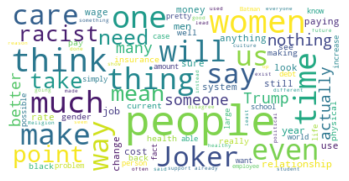

most common words: not-arg


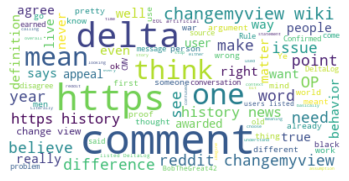

In [35]:
# Most Common Words - Visual

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import wordcloud

import matplotlib.pyplot as plt

df_arg = df_corpus[df_corpus["label"] == "arg"]
df_notarg = df_corpus[df_corpus["label"] == "not-arg"]
concat_arg = " ".join(arg for arg in df_arg.text)
concat_notarg = " ".join(arg for arg in df_notarg.text)

wordcloud_arg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(concat_arg)
wordcloud_notarg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(concat_notarg)

plt.imshow(wordcloud_arg, interpolation='bilinear')
plt.axis("off")
print("most common words: arg")
plt.show()

plt.imshow(wordcloud_notarg, interpolation='bilinear')
plt.axis("off")
print("most common words: not-arg")
plt.show()

In [38]:
# Full vocabulary of dataset and number of occurances
print(pd.DataFrame(df_dtm.sum()))

                                                                    0
000                                                                 2
0001                                                                1
10                                                                  4
100                                                                 2
12                                                                  2
14                                                                  1
15                                                                  1
1800s                                                               1
1820                                                                1
1950s                                                               1
19th                                                                2
1k                                                                  1
20                                                                  2
2008                